In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [4]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [5]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [6]:
df.shape

(22, 3)

In [7]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

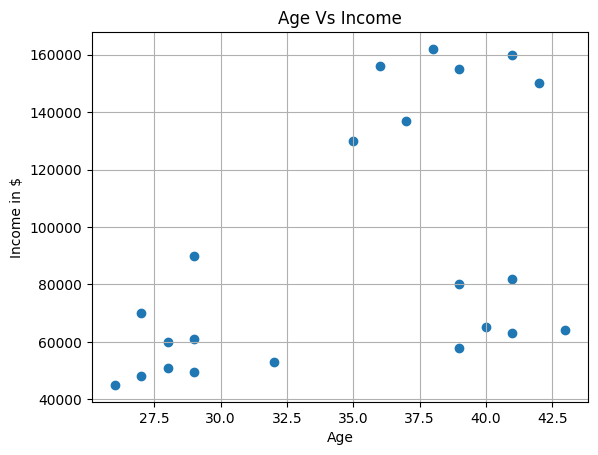

In [17]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income in $')
plt.title('Age Vs Income')
plt.grid()
plt.show()

In [19]:
# As we can see the clustering is very simple

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [20]:
kmean = KMeans(n_clusters=3)

In [21]:
kmean

KMeans(n_clusters=3)

In [24]:
y_pred = kmean.fit_predict(df[['Age','Income($)']])
print(y_pred)

[0 2 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 2 0]


In [25]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


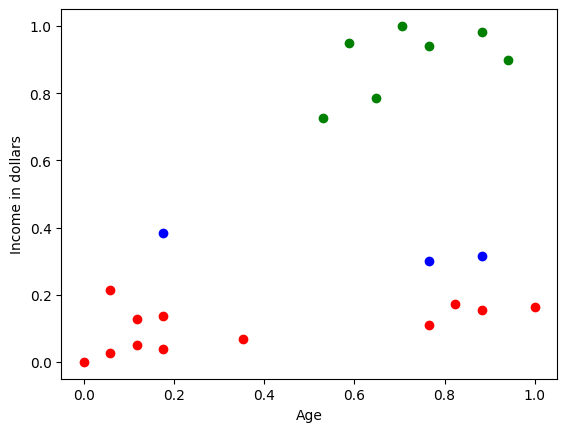

In [56]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# grouping rows on the basis of cluster value into seprate df's like df1, df2 and df3
# Now these are seprate dataframes

plt.scatter(df1['Age'],df1['Income($)'], color = 'red', label = 'Income1')
plt.scatter(df2['Age'],df2['Income($)'], color = 'green', label = 'Income2')
plt.scatter(df3['Age'],df3['Income($)'], color = 'blue',label = 'Income3')


plt.xlabel('Age')
plt.ylabel('Income in dollars')
plt.show()
# plt.legend()


In [42]:
# As we can see that the clustering is not done properly because the scaling is not done correctly therefore now we will scale
# axies so that we can seee the third cluseter as well

In [47]:
# This will scale the income to between 0 and 1

scale = MinMaxScaler()
scale.fit(df[['Income($)']])



MinMaxScaler()

In [49]:
df['Income($)'] = scale.transform(df[['Income($)']])
df.head(10)

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [52]:
# Now lets do it for age as well
scale.fit(df[['Age']])
df['Age'] = scale.transform(df[['Age']])
df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [59]:
# Now as of now the scales are in proper order now we can use Kmean again

km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])
print(y_pred)

[0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 2 2 2 2 2 2]


In [62]:
df['cluster'] = y_pred

In [63]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


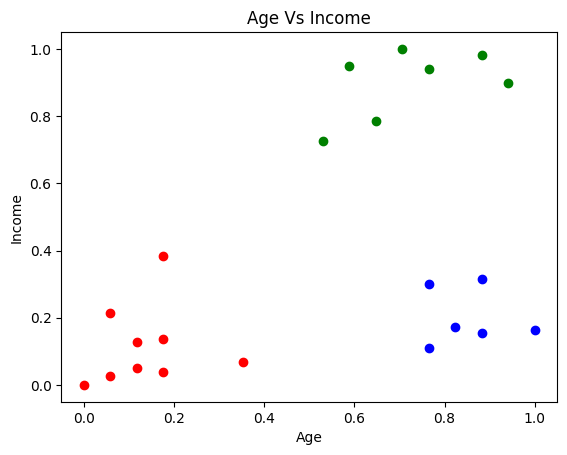

In [64]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]


plt.scatter(df0['Age'],df0['Income($)'], color='red')
plt.scatter(df1['Age'],df1['Income($)'], color='green')
plt.scatter(df2['Age'],df2['Income($)'], color='blue')



plt.xlabel("Age")
plt.ylabel('Income')
plt.title('Age Vs Income')
plt.show()


In [69]:
# We can also show the centroids that will show how the clusters are formed

centroid = km.cluster_centers_
centroid

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [74]:
# Now lets add these clusters to the scatterplot as well for better understanding

c1 = centroid[:,0]
c2 = centroid[:,1]
print(c1)
print(c2)

[0.1372549  0.72268908 0.85294118]
[0.11633428 0.8974359  0.2022792 ]


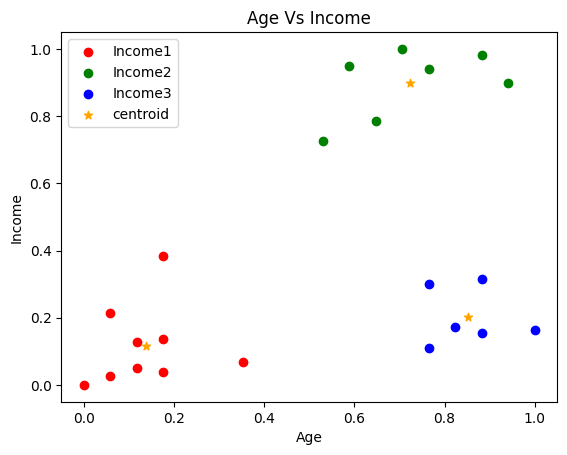

In [79]:
plt.scatter(df0['Age'],df0['Income($)'], color='red',label='Income1')
plt.scatter(df1['Age'],df1['Income($)'], color='green',label='Income2')
plt.scatter(df2['Age'],df2['Income($)'], color='blue',label='Income3')
plt.scatter(c1,c2,color='orange', marker='*',label='centroid')



plt.xlabel("Age")
plt.ylabel('Income')
plt.title('Age Vs Income')
plt.legend()
plt.show()


In [ ]:
# However in this case the data was easy to visualize but in real life the data is very messy sometimes and to get the value of K
# in that case becomes very difficult so we use the Elbow method

In [82]:
k_range = range(1,10)
sse = []

for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)


In [83]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.4463816795562971,
 0.31989811203673735,
 0.24700953462820216,
 0.19852612571759054,
 0.15397520492084715,
 0.11657275839136369]

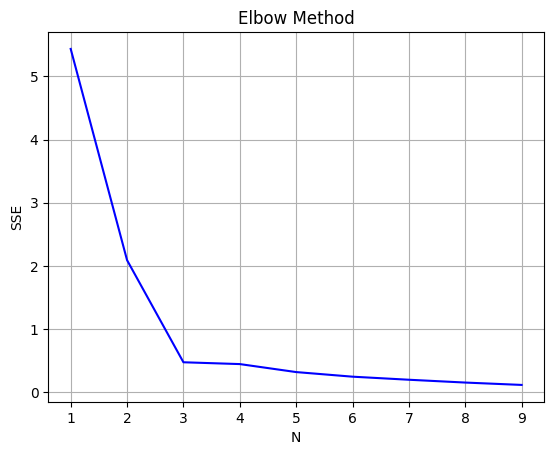

In [100]:
plt.plot(k_range,sse,color='blue',linestyle='-')
plt.xlabel('N')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [101]:
# As we can see that n=3 is the place where elbow is geting formed so our assumption was correct of taking n=3